In [1]:
import datadotworld as dw
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# data.world location of the datafile
data_source = 'dakimova/medicare-top-drugs-analysis'
# get 2012-2016 medicare part d data, broken up by manufacturer and drug
spend_manufact = dw.query(
    data_source, 
    'SELECT * FROM manufacturer_summary'
).dataframe.replace(r'^\s+$', np.nan, regex=True)
# get 2012-2016 medicare pard d data, grouped by "brand" name 
spend_by_brand = dw.query(
    data_source,
    'SELECT * FROM spending_utilization_ytd_2016'
).dataframe.replace(r'^\s+$', np.nan, regex=True)

In [3]:
spend_manufact.shape

(6842, 40)

In [4]:
spend_manufact.isnull().sum(axis = 0).to_frame().reset_index()[0].value_counts().to_frame().reset_index().sort_values(by = 'index')

,index,0
0,0,15
7,18,2
5,25,2
1,633,5
4,672,2
3,1357,5
6,1429,2
2,1920,5
8,1988,2


In [5]:
spend_manufact

,brand_name,generic_name,manufacturer,total_spending,total_dosage_units,total_claims,total_beneficiaries,average_spending_per_dosage_unit_weighted,average_spending_per_claim,average_spending_per_beneficiary,...,average_spending_per_beneficiary_4,total_spending_5,total_dosage_units_5,total_claims_5,total_beneficiaries_5,average_spending_per_dosage_unit_weighted_5,average_spending_per_claim_5,average_spending_per_beneficiary_5,change_in_average_spending_per_dosage_unit_2015_2016,annual_growth_rate_in_average_spending_per_dosage_unit_2012_2016
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Owen Mumford Us,75374.2,403344,3468,1249,0.186888889,21.734198385,60.34763811,...,58.676412615,2.159304e+05,1.050323e+06,8897,3423,0.206922,24.270027,63.082217353,0.107256,0.025783
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",Owen Mumford Us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.517725173,3.700909e+05,1.715263e+06,14318,6456,0.215836,25.847949,57.325114622,0.079807,0.037343
2,Abilify Maintena,Aripiprazole,Otsuka America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10589.955576,2.018566e+08,1.172473e+05,116230,17158,1721.523840,1736.699891,11764.577946,0.076626,0.061703
3,Acyclovir,Acyclovir,Zydus Pharmaceu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.090922711,1.044723e+06,4.770349e+06,71214,41523,0.224620,14.670189,25.160100426,0.052988,-0.058246
4,Carteolol HCl,Carteolol HCl,Valeant,275693.8,108540.05,11648,2992,2.5400190989,23.66876717,92.143649733,...,58.545626767,2.354746e+05,1.194950e+05,11700,3382,1.970582,20.126038,69.625857481,0.187589,-0.061489
5,Cartia Xt,Diltiazem HCl,Actavis Pharma,27960196.6,34242042.236,671133,175642,0.8223067344,41.661185786,159.18855741,...,136.24935606,6.011638e+07,1.114285e+08,1744056,432001,0.540914,34.469296,139.15797165,-0.099079,-0.099417
6,Carvedilol,Carvedilol,Ahp,144793.21,676830,12770,2402,0.2138492058,11.338544244,60.280270608,...,22.392753929,6.367766e+04,4.217685e+05,7592,1852,0.151586,8.387468,34.383185745,0.095191,-0.082433
7,Carvedilol,Carvedilol,Apotex Corp,705173.36,4262189.5,64623,14039,0.1655101509,10.912111168,50.229600399,...,21.915300737,2.073631e+04,3.058040e+05,4160,1162,0.067724,4.984690,17.845361446,-0.109089,-0.200203
8,Carvedilol,Carvedilol,Aurobindo Pharm,16801395.11,122035978.04,1051521,292401,0.1382354671,15.978183137,57.460115082,...,30.74178049,2.618658e+07,3.025842e+08,2749853,670864,0.086738,9.522901,39.034108836,0.071145,-0.109984
9,Carvedilol,Carvedilol,Avkare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.622239546,5.586000e+02,8.338000e+03,106,53,0.066994,5.269811,10.539622642,-0.330124,-0.228466


In [6]:
spend_by_brand.shape

(2828, 40)

In [7]:
spend_by_brand.isnull().sum(axis = 0).to_frame().reset_index()[0].value_counts()

0      15
381     5
563     5
167     5
8       4
180     2
400     2
577     2
Name: 0, dtype: int64

In [8]:
spend_by_brand.groupby(['brand_name', 'generic_name']).size().value_counts()

1    2828
dtype: int64

In [9]:
count_by_brand = spend_by_brand.brand_name.value_counts().to_frame().reset_index()
spend_by_brand[spend_by_brand.brand_name.isin(count_by_brand.loc[count_by_brand['brand_name'] > 1]['index'])]

,brand_name,generic_name,number_of_manufacturers,total_spending,total_dosage_units,total_claims,total_beneficiaries,average_spending_per_dosage_unit_weighted,average_spending_per_claim,average_spending_per_beneficiary,...,average_spending_per_beneficiary_4,total_spending_5,total_dosage_units_5,total_claims_5,total_beneficiaries_5,average_spending_per_dosage_unit_weighted_5,average_spending_per_claim_5,average_spending_per_beneficiary_5,change_in_average_spending_per_dosage_unit_2015_2016,annual_growth_rate_in_average_spending_per_dosage_unit_2012_2016
75,Gelnique,Oxybutynin,1,946195.34,493275,4524,2839,1.9181903401,209.15016357,333.28472702,...,808.65707317,4.534818e+05,1.599020e+05,1393,729,2.835998,325.543281,622.06006859,0.129129,0.102690
76,Gelnique,Oxybutynin Chloride,1,9440828.52,1637310,43554,13200,5.7660605017,216.7614575,715.21428182,...,1302.8632771,3.186095e+06,3.260060e+05,7118,2018,9.773118,447.611000,1578.8380079,0.170921,0.141007
85,Gentamicin Sulfate,Gentamicin Sulfate,8,5264939.48,12863887.786,358337,240927,1.3182945273,14.692704019,21.852841234,...,39.057543738,1.442038e+07,1.932971e+07,419546,276932,1.801411,34.371403,52.071933652,0.247567,0.081185
86,Gentamicin Sulfate,Gentamicin Sulfate/PF,1,15672.69,90488.5,273,124,0.173200904,57.409120879,126.39266129,...,226.73872727,1.749617e+04,6.335302e+04,231,83,0.276169,75.740996,210.79722892,-0.012621,0.123716
89,Geodon,Ziprasidone HCl,1,155169105.19,15927098.5,293254,95383,9.6836334173,529.12869113,1626.8004276,...,6666.1563581,1.139797e+07,6.883610e+05,10987,1457,16.543779,1037.404739,7822.9003912,0.122985,0.143271
90,Geodon,Ziprasidone Mesylate,1,924657.92,55017,9018,3922,16.806767363,102.53469949,235.7618358,...,376.2029105,1.325302e+06,4.613650e+04,6724,2805,28.725680,197.100287,472.47854902,0.163900,0.143396
130,Granisetron HCl,Granisetron HCl,8,1422450.23,120958,4918,2138,14.9232802,289.23347499,665.31816183,...,365.49706179,8.405184e+05,1.226360e+05,6167,2355,10.110211,136.292909,356.90801274,0.078820,-0.092756
131,Granisetron HCl,Granisetron HCl/PF,2,3240.15,201,149,39,16.897609502,21.745973154,83.080769231,...,189.05098214,1.587013e+04,1.719000e+03,519,166,9.467522,30.578285,95.603192771,-0.149975,-0.134827
149,Haloperidol,Haloperidol,6,23962329.96,65385045.024,1215379,199425,0.3679085618,19.715932199,120.15710147,...,224.36892127,3.918932e+07,6.425408e+07,1198091,183633,0.613438,32.709800,213.41107976,-0.067738,0.136339
150,Haloperidol,Haloperidol Lactate,1,156062.23,23234.4,3855,2491,6.7168607754,40.483068742,62.650433561,...,50.248607595,1.001423e+05,2.005050e+04,2657,1790,4.994502,37.689977,55.945402235,-0.225587,-0.071394


In [10]:
spend_by_brand.describe()

,number_of_manufacturers,total_spending_4,total_dosage_units_4,total_claims_4,average_spending_per_dosage_unit_weighted_4,average_spending_per_claim_4,total_spending_5,total_dosage_units_5,total_claims_5,average_spending_per_dosage_unit_weighted_5,average_spending_per_claim_5,change_in_average_spending_per_dosage_unit_2015_2016,annual_growth_rate_in_average_spending_per_dosage_unit_2012_2016
count,2828.000000,2.828000e+03,2.828000e+03,2.828000e+03,2828.000000,2828.000000,2.828000e+03,2.828000e+03,2.828000e+03,2828.000000,2828.000000,2828.000000,2828.000000
mean,2.419378,4.845327e+07,3.446260e+07,5.115572e+05,152.946777,1277.057298,5.000098e+07,3.527167e+07,5.108662e+05,164.867028,1366.112701,0.060267,0.077915
std,3.364888,2.198677e+08,1.726290e+08,2.502103e+06,1279.976627,4456.629943,2.018601e+08,1.780855e+08,2.504987e+06,1344.666052,4651.701954,0.284300,0.282813
min,1.000000,3.385500e+02,6.500000e+01,5.200000e+01,0.002522,1.536694,3.363600e+02,5.700000e+01,5.100000e+01,0.002441,1.624928,-0.877053,-0.763387
25%,1.000000,2.309311e+05,4.453957e+04,9.505000e+02,0.752625,46.426156,2.040549e+05,3.898675e+04,8.807500e+02,0.752685,45.740819,-0.049171,-0.026805
50%,1.000000,2.217860e+06,3.909288e+05,7.226500e+03,4.163500,188.889521,2.129960e+06,3.416170e+05,6.623500e+03,4.240727,200.556518,0.033282,0.060236
75%,2.000000,1.981234e+07,4.974950e+06,8.595025e+04,15.913286,563.017444,2.052763e+07,4.891165e+06,8.937500e+04,16.983111,614.072864,0.126517,0.141767
max,34.000000,7.030633e+09,2.858542e+09,3.943832e+07,35457.427839,63959.690856,4.399702e+09,3.012175e+09,4.440214e+07,37668.612287,71701.854215,6.162214,11.233856


In [11]:
spend_manufact.head(5)

,brand_name,generic_name,manufacturer,total_spending,total_dosage_units,total_claims,total_beneficiaries,average_spending_per_dosage_unit_weighted,average_spending_per_claim,average_spending_per_beneficiary,...,average_spending_per_beneficiary_4,total_spending_5,total_dosage_units_5,total_claims_5,total_beneficiaries_5,average_spending_per_dosage_unit_weighted_5,average_spending_per_claim_5,average_spending_per_beneficiary_5,change_in_average_spending_per_dosage_unit_2015_2016,annual_growth_rate_in_average_spending_per_dosage_unit_2012_2016
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Owen Mumford Us,75374.2,403344,3468,1249,0.186888889,21.734198385,60.34763811,...,58.676412615,2.159304e+05,1050323.000,8897,3423,0.206922,24.270027,63.082217353,0.107256,0.025783
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",Owen Mumford Us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.517725173,3.700909e+05,1715263.000,14318,6456,0.215836,25.847949,57.325114622,0.079807,0.037343
2,Abilify Maintena,Aripiprazole,Otsuka America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10589.955576,2.018566e+08,117247.314,116230,17158,1721.523840,1736.699891,11764.577946,0.076626,0.061703
3,Acyclovir,Acyclovir,Zydus Pharmaceu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.090922711,1.044723e+06,4770349.000,71214,41523,0.224620,14.670189,25.160100426,0.052988,-0.058246
4,Carteolol HCl,Carteolol HCl,Valeant,275693.8,108540.05,11648,2992,2.5400190989,23.66876717,92.143649733,...,58.545626767,2.354746e+05,119495.000,11700,3382,1.970582,20.126038,69.625857481,0.187589,-0.061489


In [12]:
spend_manufact.columns

Index(['brand_name', 'generic_name', 'manufacturer', 'total_spending',
       'total_dosage_units', 'total_claims', 'total_beneficiaries',
       'average_spending_per_dosage_unit_weighted',
       'average_spending_per_claim', 'average_spending_per_beneficiary',
       'total_spending_2', 'total_dosage_units_2', 'total_claims_2',
       'total_beneficiaries_2', 'average_spending_per_dosage_unit_weighted_2',
       'average_spending_per_claim_2', 'average_spending_per_beneficiary_2',
       'total_spending_3', 'total_dosage_units_3', 'total_claims_3',
       'total_beneficiaries_3', 'average_spending_per_dosage_unit_weighted_3',
       'average_spending_per_claim_3', 'average_spending_per_beneficiary_3',
       'total_spending_4', 'total_dosage_units_4', 'total_claims_4',
       'total_beneficiaries_4', 'average_spending_per_dosage_unit_weighted_4',
       'average_spending_per_claim_4', 'average_spending_per_beneficiary_4',
       'total_spending_5', 'total_dosage_units_5', 'total_cla

In [13]:
spend_by_brand.columns
# note that both dataframes have the issue of repeating columns names - these are for each yearb

Index(['brand_name', 'generic_name', 'number_of_manufacturers',
       'total_spending', 'total_dosage_units', 'total_claims',
       'total_beneficiaries', 'average_spending_per_dosage_unit_weighted',
       'average_spending_per_claim', 'average_spending_per_beneficiary',
       'total_spending_2', 'total_dosage_units_2', 'total_claims_2',
       'total_beneficiaries_2', 'average_spending_per_dosage_unit_weighted_2',
       'average_spending_per_claim_2', 'average_spending_per_beneficiary_2',
       'total_spending_3', 'total_dosage_units_3', 'total_claims_3',
       'total_beneficiaries_3', 'average_spending_per_dosage_unit_weighted_3',
       'average_spending_per_claim_3', 'average_spending_per_beneficiary_3',
       'total_spending_4', 'total_dosage_units_4', 'total_claims_4',
       'total_beneficiaries_4', 'average_spending_per_dosage_unit_weighted_4',
       'average_spending_per_claim_4', 'average_spending_per_beneficiary_4',
       'total_spending_5', 'total_dosage_units_5',

In [14]:
colnames = list(spend_by_brand)[3:10] * 5
years = ['.2012'] * 7 + ['.2013'] * 7 + ['.2014'] * 7 + ['.2015'] * 7 + ['.2016'] * 7
new_colnames = []
for i in range(len(colnames)):
    new_colnames.append(colnames[i] + years[i])


In [15]:
len(list(spend_by_brand)[0:3] + new_colnames + list(spend_by_brand)[-2:])

40

In [16]:
list(spend_manufact)[3:10] == list(spend_by_brand)[3:10]

True

In [17]:
spend_by_brand.columns = list(spend_by_brand)[0:3] + new_colnames + list(spend_by_brand)[-2:]
spend_manufact.columns = list(spend_manufact)[0:3] + new_colnames + list(spend_manufact)[-2:]

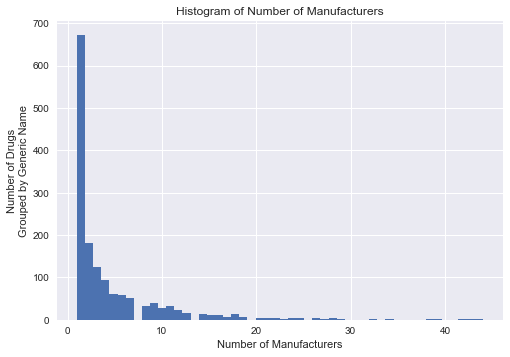

In [18]:
manufact_by_generic = spend_by_brand.groupby('generic_name')['number_of_manufacturers'].agg('sum')
manufact_by_generic.hist(bins = 50)
plt.xlabel('Number of Manufacturers')
plt.ylabel('Number of Drugs\nGrouped by Generic Name')
plt.title('Histogram of Number of Manufacturers')
plt.show()

In [19]:
top_by_manufact = manufact_by_generic.sort_values(ascending = False).head(100).to_frame().reset_index()
top_by_manufact.head(20)

,generic_name,number_of_manufacturers
0,Levetiracetam,44
1,"Syringe And Needle,Insulin,1ml",43
2,"Pen Needle, Diabetic",43
3,Metformin HCl,42
4,"Syringe-Needle,Insulin,0.5 Ml",39
5,Alcohol Antiseptic Pads,38
6,"Syring-Needl,Disp,Insul,0.3 Ml",38
7,Potassium Chloride,34
8,Bupropion HCl,32
9,Lisinopril,29


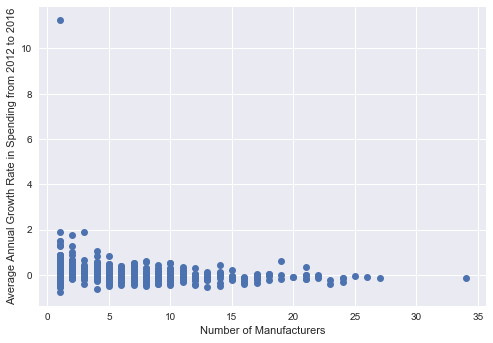

In [20]:
plt.plot('number_of_manufacturers', 'annual_growth_rate_in_average_spending_per_dosage_unit_2012_2016', data = spend_by_brand, linestyle='none', marker='o')
plt.xlabel('Number of Manufacturers')
plt.ylabel('Average Annual Growth Rate in Spending from 2012 to 2016')
plt.show()

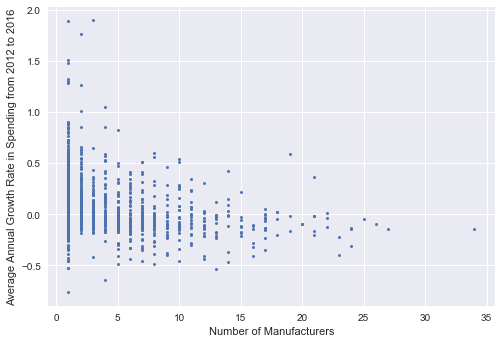

In [21]:
plt.plot(
    'number_of_manufacturers', 
    'annual_growth_rate_in_average_spending_per_dosage_unit_2012_2016', 
    data = spend_by_brand[spend_by_brand.annual_growth_rate_in_average_spending_per_dosage_unit_2012_2016 < 10], 
    linestyle='none', marker='o',
    markersize=3
)
plt.xlabel('Number of Manufacturers')
plt.ylabel('Average Annual Growth Rate in Spending from 2012 to 2016')
plt.show()

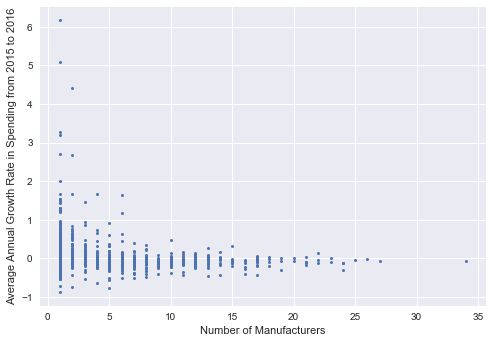

In [22]:

plt.plot(
    'number_of_manufacturers', 
    'change_in_average_spending_per_dosage_unit_2015_2016', 
    data = spend_by_brand, 
    linestyle='none', marker='o',
    markersize=3
)
plt.xlabel('Number of Manufacturers')
plt.ylabel('Average Annual Growth Rate in Spending from 2015 to 2016')
plt.show()

In [23]:
spend_by_brand.drop(['change_in_average_spending_per_dosage_unit_2015_2016',
       'annual_growth_rate_in_average_spending_per_dosage_unit_2012_2016'], axis=1)

,brand_name,generic_name,number_of_manufacturers,total_spending.2012,total_dosage_units.2012,total_claims.2012,total_beneficiaries.2012,average_spending_per_dosage_unit_weighted.2012,average_spending_per_claim.2012,average_spending_per_beneficiary.2012,...,average_spending_per_dosage_unit_weighted.2015,average_spending_per_claim.2015,average_spending_per_beneficiary.2015,total_spending.2016,total_dosage_units.2016,total_claims.2016,total_beneficiaries.2016,average_spending_per_dosage_unit_weighted.2016,average_spending_per_claim.2016,average_spending_per_beneficiary.2016
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,75374.2,403344,3468,1249,0.186888889,21.734198385,60.34763811,...,0.186878,23.140136,58.676412615,2.159304e+05,1.050323e+06,8897,3423,0.206922,24.270027,63.082217353
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.199884,24.979943,45.517725173,3.700909e+05,1.715263e+06,14318,6456,0.215836,25.847949,57.325114622
2,Acamprosate Calcium,Acamprosate Calcium,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.931592,147.325822,472.83121471,4.100336e+06,4.419061e+06,27893,8771,0.927547,147.002330,467.48785543
3,Alrex,Loteprednol Etabonate,1,14891002.64,629642,96481,46386,23.649951306,154.34129663,321.02364162,...,36.032674,233.711428,486.08699331,1.254702e+07,3.477385e+05,53019,24670,36.081782,236.651481,508.59444102
4,Fluorouracil,Fluorouracil,7,28446895.94,5795803.946,143478,120814,5.0914759236,198.26660492,235.46026073,...,5.111540,192.454493,227.10348662,6.469983e+07,1.543707e+07,379706,323656,4.541784,170.394546,199.90308065
5,Fluoxetine Dr,Fluoxetine HCl,1,710526.71,27385,5496,1039,25.945835676,129.28069687,683.85631376,...,29.240608,184.268668,1066.3436334,1.476423e+06,5.434700e+04,8481,1456,27.166599,174.085976,1014.0268956
6,Fluoxetine HCl,Fluoxetine HCl,17,77143502.93,303694579.24,5528669,958030,0.2720010651,13.953358924,80.523055572,...,0.265223,15.003451,84.691542252,9.979408e+07,3.863516e+08,6461096,1209680,0.274014,15.445380,82.496267534
7,Fluphenazine Decanoate,Fluphenazine Decanoate,2,9235846.6,561414.135,105967,19961,16.451040371,87.157762322,462.69458444,...,27.777787,142.687003,770.78208062,1.229675e+07,4.630284e+05,90089,15848,26.582766,136.495544,775.91791204
8,Fluphenazine HCl,Fluphenazine HCl,6,4795162.31,15556549.031,252952,34343,0.3559829249,18.95680726,139.62560959,...,0.360942,18.191501,141.63347256,9.227446e+06,1.280999e+07,206963,31065,0.781261,44.585005,297.0367391
9,Flurazepam HCl,Flurazepam HCl,2,86505.12,462141,12512,2884,0.1883553845,6.9137723785,29.994840499,...,0.428200,15.288525,61.310582742,8.820611e+05,1.543740e+06,42431,10699,0.577657,20.788128,82.443318067


In [24]:
spend_by_brand_tidy = pd.melt(
    frame = spend_by_brand.drop(
        ['change_in_average_spending_per_dosage_unit_2015_2016', 'annual_growth_rate_in_average_spending_per_dosage_unit_2012_2016'], 
        axis=1
    ), 
    id_vars = ['brand_name', 'generic_name', 'number_of_manufacturers']
)
spend_by_brand_tidy['strsplit'] = spend_by_brand_tidy.variable.str.split('.')
spend_by_brand_tidy['variable'] = spend_by_brand_tidy.strsplit.str.get(0)
spend_by_brand_tidy['year'] = spend_by_brand_tidy.strsplit.str.get(1)
spend_by_brand_tidy = spend_by_brand_tidy.drop('strsplit', axis = 1)
spend_by_brand_tidy.head()

,brand_name,generic_name,number_of_manufacturers,variable,value,year
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,total_spending,75374.2,2012
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,total_spending,NaN,2012
2,Acamprosate Calcium,Acamprosate Calcium,3,total_spending,NaN,2012
3,Alrex,Loteprednol Etabonate,1,total_spending,14891002.64,2012
4,Fluorouracil,Fluorouracil,7,total_spending,28446895.94,2012


In [25]:
spend_by_brand_tidy.duplicated(['brand_name', 'generic_name', 'number_of_manufacturers', 'variable', 'year']).sum()

0

In [26]:
spend_by_brand_tidy.value = spend_by_brand_tidy.value.astype(float)

In [27]:
spend_by_brand_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98980 entries, 0 to 98979
Data columns (total 6 columns):
brand_name                 98980 non-null object
generic_name               98980 non-null object
number_of_manufacturers    98980 non-null int64
variable                   98980 non-null object
value                      91079 non-null float64
year                       98980 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 4.5+ MB


In [28]:
spend_by_brand_tidy = pd.pivot_table(spend_by_brand_tidy,
    index = ['brand_name', 'generic_name', 'number_of_manufacturers', 'year'],
    columns = 'variable',
    values = 'value'
).reset_index()
spend_by_brand_tidy.reset_index().describe()

variable,index,number_of_manufacturers,average_spending_per_beneficiary,average_spending_per_claim,average_spending_per_dosage_unit_weighted,total_beneficiaries,total_claims,total_dosage_units,total_spending
count,14140.000000,14140.000000,12967.000000,13029.000000,13029.000000,1.296700e+04,1.302900e+04,1.302900e+04,1.302900e+04
mean,7069.500000,2.419378,5551.719799,1067.150094,136.697837,1.310032e+05,5.162222e+05,3.426526e+07,4.462750e+07
std,4082.010738,3.364412,27120.147605,3959.898093,1286.038529,5.483092e+05,2.421248e+06,1.636587e+08,1.844390e+08
min,0.000000,1.000000,0.020833,0.009804,0.000327,1.100000e+01,1.100000e+01,1.100000e+01,5.000000e-01
25%,3534.750000,1.000000,122.329307,40.985359,0.691461,3.470000e+02,1.019000e+03,4.715200e+04,2.037856e+05
50%,7069.500000,1.000000,469.711343,157.818623,3.303364,2.493000e+03,8.505000e+03,4.471025e+05,2.085243e+06
75%,10604.250000,2.000000,1695.907229,451.965177,12.657691,2.886250e+04,1.038980e+05,5.772784e+06,1.887638e+07
max,14139.000000,34.000000,573159.367450,71701.854215,38359.344742,9.404753e+06,4.440214e+07,3.012175e+09,7.030633e+09


In [29]:
spend_by_brand_tidy['year'] = spend_by_brand_tidy.year.astype(int)
spend_by_brand_tidy = spend_by_brand_tidy.dropna()

In [30]:
spend_by_brand_tidy

variable,brand_name,generic_name,number_of_manufacturers,year,average_spending_per_beneficiary,average_spending_per_claim,average_spending_per_dosage_unit_weighted,total_beneficiaries,total_claims,total_dosage_units,total_spending
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,2012,60.347638,21.734198,0.186889,1249.0,3468.0,4.033440e+05,7.537420e+04
1,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,2013,58.356605,21.603679,0.182160,1620.0,4376.0,5.189200e+05,9.453770e+04
2,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,2014,59.073167,21.936957,0.182074,2087.0,5620.0,6.771600e+05,1.232857e+05
3,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,2015,58.676413,23.140136,0.186878,2283.0,5789.0,7.175480e+05,1.339582e+05
4,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,2016,63.082217,24.270027,0.206922,3423.0,8897.0,1.050323e+06,2.159304e+05
7,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,2014,41.963763,23.776391,0.200576,1289.0,2275.0,2.697250e+05,5.409129e+04
8,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,2015,45.517725,24.979943,0.199884,4330.0,7890.0,9.860700e+05,1.970918e+05
9,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,2016,57.325115,25.847949,0.215836,6456.0,14318.0,1.715263e+06,3.700909e+05
10,Abacavir,Abacavir Sulfate,5,2012,1839.819444,494.753208,7.770226,5616.0,20884.0,1.329746e+06,1.033243e+07
11,Abacavir,Abacavir Sulfate,5,2013,3219.889984,455.868233,7.158672,8354.0,59006.0,3.757506e+06,2.689896e+07


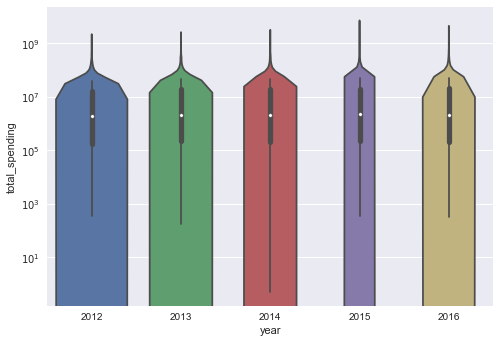

In [31]:
sns.violinplot(x = "year", y = "total_spending", data = spend_by_brand_tidy)
plt.yscale("log")
plt.show()

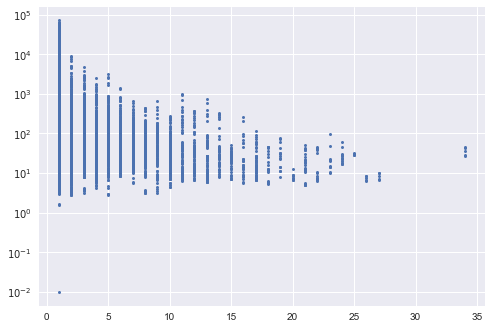

In [32]:
plt.plot(
    'number_of_manufacturers',
    'average_spending_per_claim',
    data = spend_by_brand_tidy,
    linestyle = 'none', marker = 'o',
    markersize = 3
)
plt.yscale('log')
plt.show()


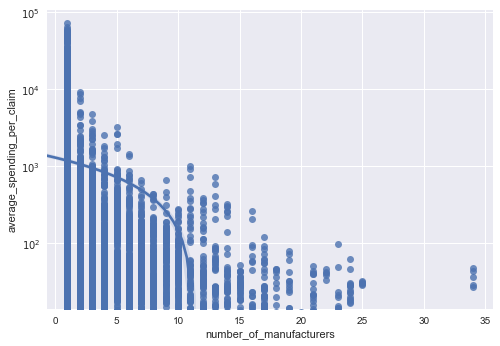

In [33]:
sns.regplot('number_of_manufacturers', 'average_spending_per_claim', data = spend_by_brand_tidy)
plt.yscale('log')
plt.show()

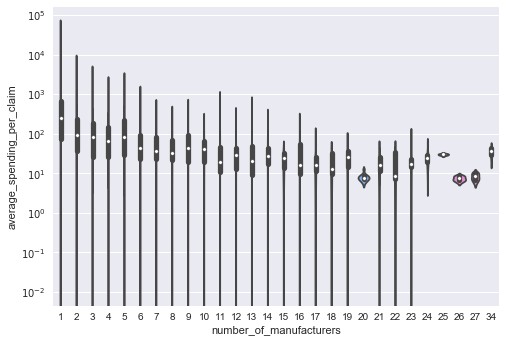

In [34]:
sns.violinplot(x = 'number_of_manufacturers', y = 'average_spending_per_claim', data = spend_by_brand_tidy)
plt.yscale('log')
plt.show()

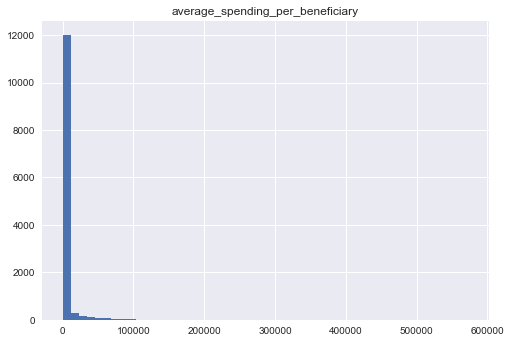

In [35]:
spend_by_brand_tidy.hist('average_spending_per_beneficiary', bins = 50)
plt.show()

In [36]:
spend_manufact

,brand_name,generic_name,manufacturer,total_spending.2012,total_dosage_units.2012,total_claims.2012,total_beneficiaries.2012,average_spending_per_dosage_unit_weighted.2012,average_spending_per_claim.2012,average_spending_per_beneficiary.2012,...,average_spending_per_beneficiary.2015,total_spending.2016,total_dosage_units.2016,total_claims.2016,total_beneficiaries.2016,average_spending_per_dosage_unit_weighted.2016,average_spending_per_claim.2016,average_spending_per_beneficiary.2016,change_in_average_spending_per_dosage_unit_2015_2016,annual_growth_rate_in_average_spending_per_dosage_unit_2012_2016
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Owen Mumford Us,75374.2,403344,3468,1249,0.186888889,21.734198385,60.34763811,...,58.676412615,2.159304e+05,1.050323e+06,8897,3423,0.206922,24.270027,63.082217353,0.107256,0.025783
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",Owen Mumford Us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.517725173,3.700909e+05,1.715263e+06,14318,6456,0.215836,25.847949,57.325114622,0.079807,0.037343
2,Abilify Maintena,Aripiprazole,Otsuka America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10589.955576,2.018566e+08,1.172473e+05,116230,17158,1721.523840,1736.699891,11764.577946,0.076626,0.061703
3,Acyclovir,Acyclovir,Zydus Pharmaceu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.090922711,1.044723e+06,4.770349e+06,71214,41523,0.224620,14.670189,25.160100426,0.052988,-0.058246
4,Carteolol HCl,Carteolol HCl,Valeant,275693.8,108540.05,11648,2992,2.5400190989,23.66876717,92.143649733,...,58.545626767,2.354746e+05,1.194950e+05,11700,3382,1.970582,20.126038,69.625857481,0.187589,-0.061489
5,Cartia Xt,Diltiazem HCl,Actavis Pharma,27960196.6,34242042.236,671133,175642,0.8223067344,41.661185786,159.18855741,...,136.24935606,6.011638e+07,1.114285e+08,1744056,432001,0.540914,34.469296,139.15797165,-0.099079,-0.099417
6,Carvedilol,Carvedilol,Ahp,144793.21,676830,12770,2402,0.2138492058,11.338544244,60.280270608,...,22.392753929,6.367766e+04,4.217685e+05,7592,1852,0.151586,8.387468,34.383185745,0.095191,-0.082433
7,Carvedilol,Carvedilol,Apotex Corp,705173.36,4262189.5,64623,14039,0.1655101509,10.912111168,50.229600399,...,21.915300737,2.073631e+04,3.058040e+05,4160,1162,0.067724,4.984690,17.845361446,-0.109089,-0.200203
8,Carvedilol,Carvedilol,Aurobindo Pharm,16801395.11,122035978.04,1051521,292401,0.1382354671,15.978183137,57.460115082,...,30.74178049,2.618658e+07,3.025842e+08,2749853,670864,0.086738,9.522901,39.034108836,0.071145,-0.109984
9,Carvedilol,Carvedilol,Avkare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.622239546,5.586000e+02,8.338000e+03,106,53,0.066994,5.269811,10.539622642,-0.330124,-0.228466


In [37]:
spend_manufact_tidy = pd.melt(
    frame = spend_manufact.drop(
        ['change_in_average_spending_per_dosage_unit_2015_2016', 'annual_growth_rate_in_average_spending_per_dosage_unit_2012_2016'], 
        axis=1
    ), 
    id_vars = ['brand_name', 'generic_name', 'manufacturer']
)
spend_manufact_tidy['strsplit'] = spend_manufact_tidy.variable.str.split('.')
spend_manufact_tidy['variable'] = spend_manufact_tidy.strsplit.str.get(0)
spend_manufact_tidy['year'] = spend_manufact_tidy.strsplit.str.get(1)
spend_manufact_tidy = spend_manufact_tidy.drop('strsplit', axis = 1)
spend_manufact_tidy.value = spend_manufact_tidy.value.astype(float)
spend_manufact_tidy.year = spend_manufact_tidy.year.astype(int)
spend_manufact_tidy.head()

,brand_name,generic_name,manufacturer,variable,value,year
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Owen Mumford Us,total_spending,75374.2,2012
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",Owen Mumford Us,total_spending,NaN,2012
2,Abilify Maintena,Aripiprazole,Otsuka America,total_spending,NaN,2012
3,Acyclovir,Acyclovir,Zydus Pharmaceu,total_spending,NaN,2012
4,Carteolol HCl,Carteolol HCl,Valeant,total_spending,275693.8,2012


In [38]:
spend_manufact_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239470 entries, 0 to 239469
Data columns (total 6 columns):
brand_name      239470 non-null object
generic_name    239470 non-null object
manufacturer    239470 non-null object
variable        239470 non-null object
value           211656 non-null float64
year            239470 non-null int32
dtypes: float64(1), int32(1), object(4)
memory usage: 10.0+ MB


In [39]:
spend_manufact_tidy = pd.pivot_table(spend_manufact_tidy,
    index = ['brand_name', 'generic_name', 'manufacturer', 'year'],
    columns = 'variable',
    values = 'value'
).reset_index()
spend_manufact_tidy.describe()

variable,year,average_spending_per_beneficiary,average_spending_per_claim,average_spending_per_dosage_unit_weighted,total_beneficiaries,total_claims,total_dosage_units,total_spending
count,34210.000000,30078.000000,30300.000000,30300.000000,3.007800e+04,3.030000e+04,3.030000e+04,3.030000e+04
mean,2014.000000,2539.576849,512.140719,60.617826,6.753206e+04,2.219755e+05,1.473406e+07,1.918983e+07
std,1.414234,18010.147161,2648.915861,846.045669,2.173638e+05,8.011509e+05,5.843475e+07,1.193507e+08
min,2012.000000,0.020833,0.009804,0.000327,1.100000e+01,1.100000e+01,1.100000e+01,5.000000e-01
25%,2013.000000,49.504805,18.634950,0.297772,4.840000e+02,1.315000e+03,6.379562e+04,9.159576e+04
50%,2014.000000,145.166026,52.668816,1.008781,3.662500e+03,1.029650e+04,5.672038e+05,9.607634e+05
75%,2015.000000,584.766705,200.086002,4.580044,3.257125e+04,9.154775e+04,5.371109e+06,6.456528e+06
max,2016.000000,573159.367450,71701.854215,38359.344742,4.914007e+06,2.248859e+07,1.328587e+09,7.030633e+09


In [40]:
spend_manufact_tidy.head()

variable,brand_name,generic_name,manufacturer,year,average_spending_per_beneficiary,average_spending_per_claim,average_spending_per_dosage_unit_weighted,total_beneficiaries,total_claims,total_dosage_units,total_spending
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Owen Mumford Us,2012,60.347638,21.734198,0.186889,1249.0,3468.0,403344.0,75374.20
1,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Owen Mumford Us,2013,58.356605,21.603679,0.182160,1620.0,4376.0,518920.0,94537.70
2,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Owen Mumford Us,2014,59.073167,21.936957,0.182074,2087.0,5620.0,677160.0,123285.70
3,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Owen Mumford Us,2015,58.676413,23.140136,0.186878,2283.0,5789.0,717548.0,133958.25
4,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Owen Mumford Us,2016,63.082217,24.270027,0.206922,3423.0,8897.0,1050323.0,215930.43


In [41]:
spend_manufact.groupby(['brand_name', 'generic_name']).size().reset_index(name = 'num_manufact').head()

,brand_name,generic_name,num_manufact
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1
2,Abacavir,Abacavir Sulfate,5
3,Abacavir-Lamivudine-Zidovudine,Abacavir/Lamivudine/Zidovudine,1
4,Abelcet,Amphotericin B Lipid Complex,1


In [42]:
gen_manufact_count = spend_manufact.groupby('generic_name').size().reset_index(name = 'num_gen_manufact')
gen_manufact_count.head()

,generic_name,num_gen_manufact
0,0.9 % Sodium Chloride,3
1,Aa 5 %/Calcium/Lytes/Dext 15 %,1
2,Abacavir Sulfate,6
3,Abacavir Sulfate/Lamivudine,1
4,Abacavir/Dolutegravir/Lamivudi,1


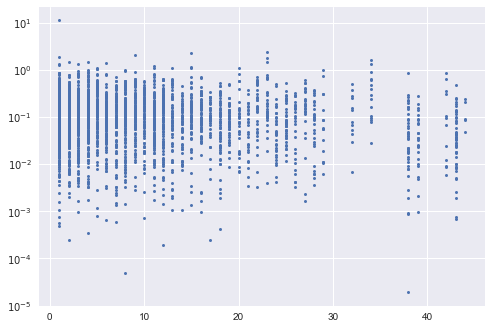

In [43]:
plt.plot(
    'num_gen_manufact',
    'annual_growth_rate_in_average_spending_per_dosage_unit_2012_2016',
    data = pd.merge(left = gen_manufact_count, right = spend_manufact, on = 'generic_name'),
    linestyle = 'none', marker = 'o',
    markersize = 3
)
plt.yscale('log')
plt.show()

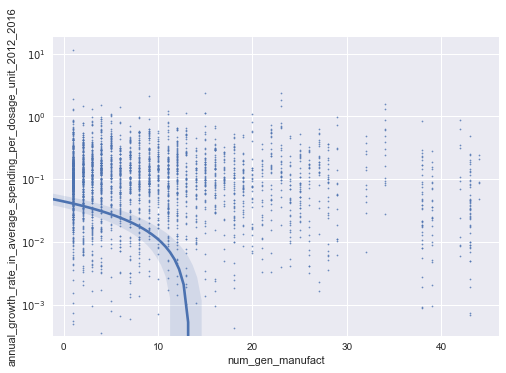

In [44]:
sns.regplot(
    'num_gen_manufact',
    'annual_growth_rate_in_average_spending_per_dosage_unit_2012_2016',
    data = pd.merge(gen_manufact_count, spend_manufact, on = 'generic_name'),
    scatter_kws = {'s':3}
)
plt.yscale('log')
plt.show()

In [45]:
spend_manufact['generic_bol'] = spend_manufact['brand_name'] == spend_manufact['generic_name']

In [46]:
spend_manufact.head()

,brand_name,generic_name,manufacturer,total_spending.2012,total_dosage_units.2012,total_claims.2012,total_beneficiaries.2012,average_spending_per_dosage_unit_weighted.2012,average_spending_per_claim.2012,average_spending_per_beneficiary.2012,...,total_spending.2016,total_dosage_units.2016,total_claims.2016,total_beneficiaries.2016,average_spending_per_dosage_unit_weighted.2016,average_spending_per_claim.2016,average_spending_per_beneficiary.2016,change_in_average_spending_per_dosage_unit_2015_2016,annual_growth_rate_in_average_spending_per_dosage_unit_2012_2016,generic_bol
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Owen Mumford Us,75374.2,403344,3468,1249,0.186888889,21.734198385,60.34763811,...,2.159304e+05,1050323.000,8897,3423,0.206922,24.270027,63.082217353,0.107256,0.025783,False
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",Owen Mumford Us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.700909e+05,1715263.000,14318,6456,0.215836,25.847949,57.325114622,0.079807,0.037343,False
2,Abilify Maintena,Aripiprazole,Otsuka America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.018566e+08,117247.314,116230,17158,1721.523840,1736.699891,11764.577946,0.076626,0.061703,False
3,Acyclovir,Acyclovir,Zydus Pharmaceu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.044723e+06,4770349.000,71214,41523,0.224620,14.670189,25.160100426,0.052988,-0.058246,True
4,Carteolol HCl,Carteolol HCl,Valeant,275693.8,108540.05,11648,2992,2.5400190989,23.66876717,92.143649733,...,2.354746e+05,119495.000,11700,3382,1.970582,20.126038,69.625857481,0.187589,-0.061489,True


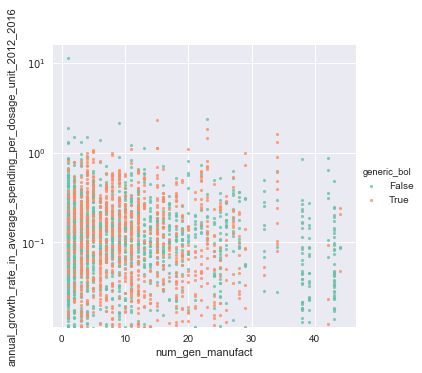

In [47]:
sns.lmplot(
    x = 'num_gen_manufact',
    y = 'annual_growth_rate_in_average_spending_per_dosage_unit_2012_2016',
    data = pd.merge(left = gen_manufact_count, right = spend_manufact, on = 'generic_name'),
    fit_reg = False,
    hue = 'generic_bol',
    scatter_kws = {'s' : 10},
    palette = 'Set2'
)
plt.yscale('log')
sns.plt.show()

In [78]:
spend_manufact_tidy.columns

Index(['brand_name', 'generic_name', 'manufacturer', 'year',
       'average_spending_per_beneficiary', 'average_spending_per_claim',
       'average_spending_per_dosage_unit_weighted', 'total_beneficiaries',
       'total_claims', 'total_dosage_units', 'total_spending'],
      dtype='object', name='variable')

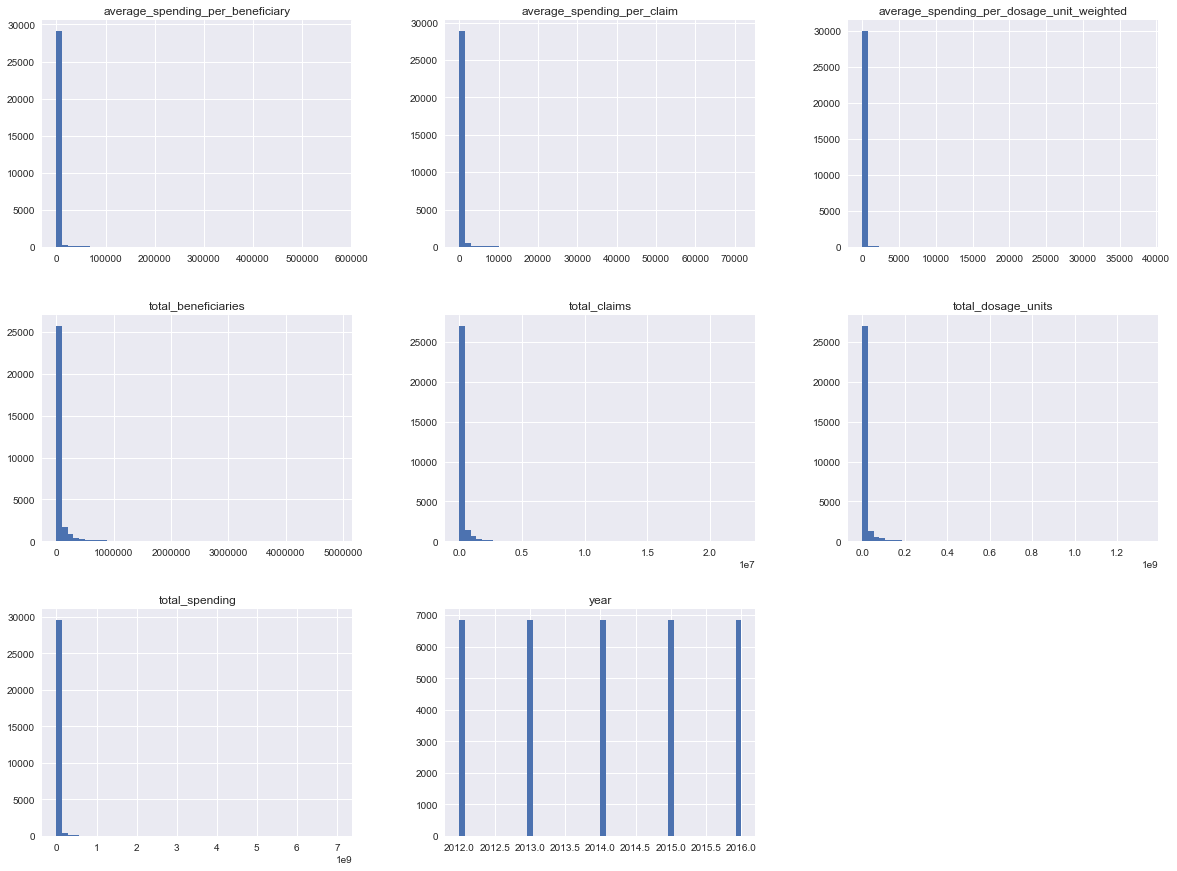

In [49]:
spend_manufact_tidy.hist(bins=50, figsize=(20,15))
plt.show()

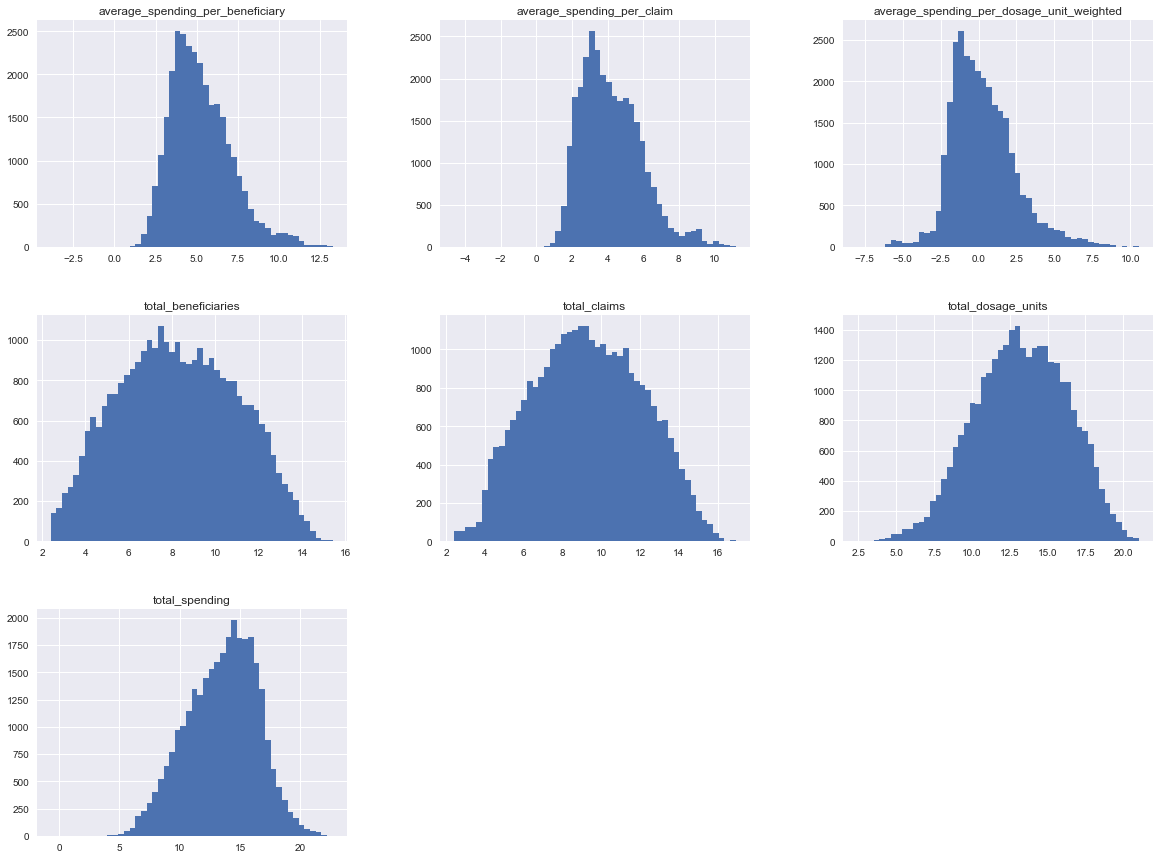

In [58]:
spend_manufact_tidy.iloc[:, 4:].apply(np.log).hist(bins=50, figsize=(20,15))
plt.show()

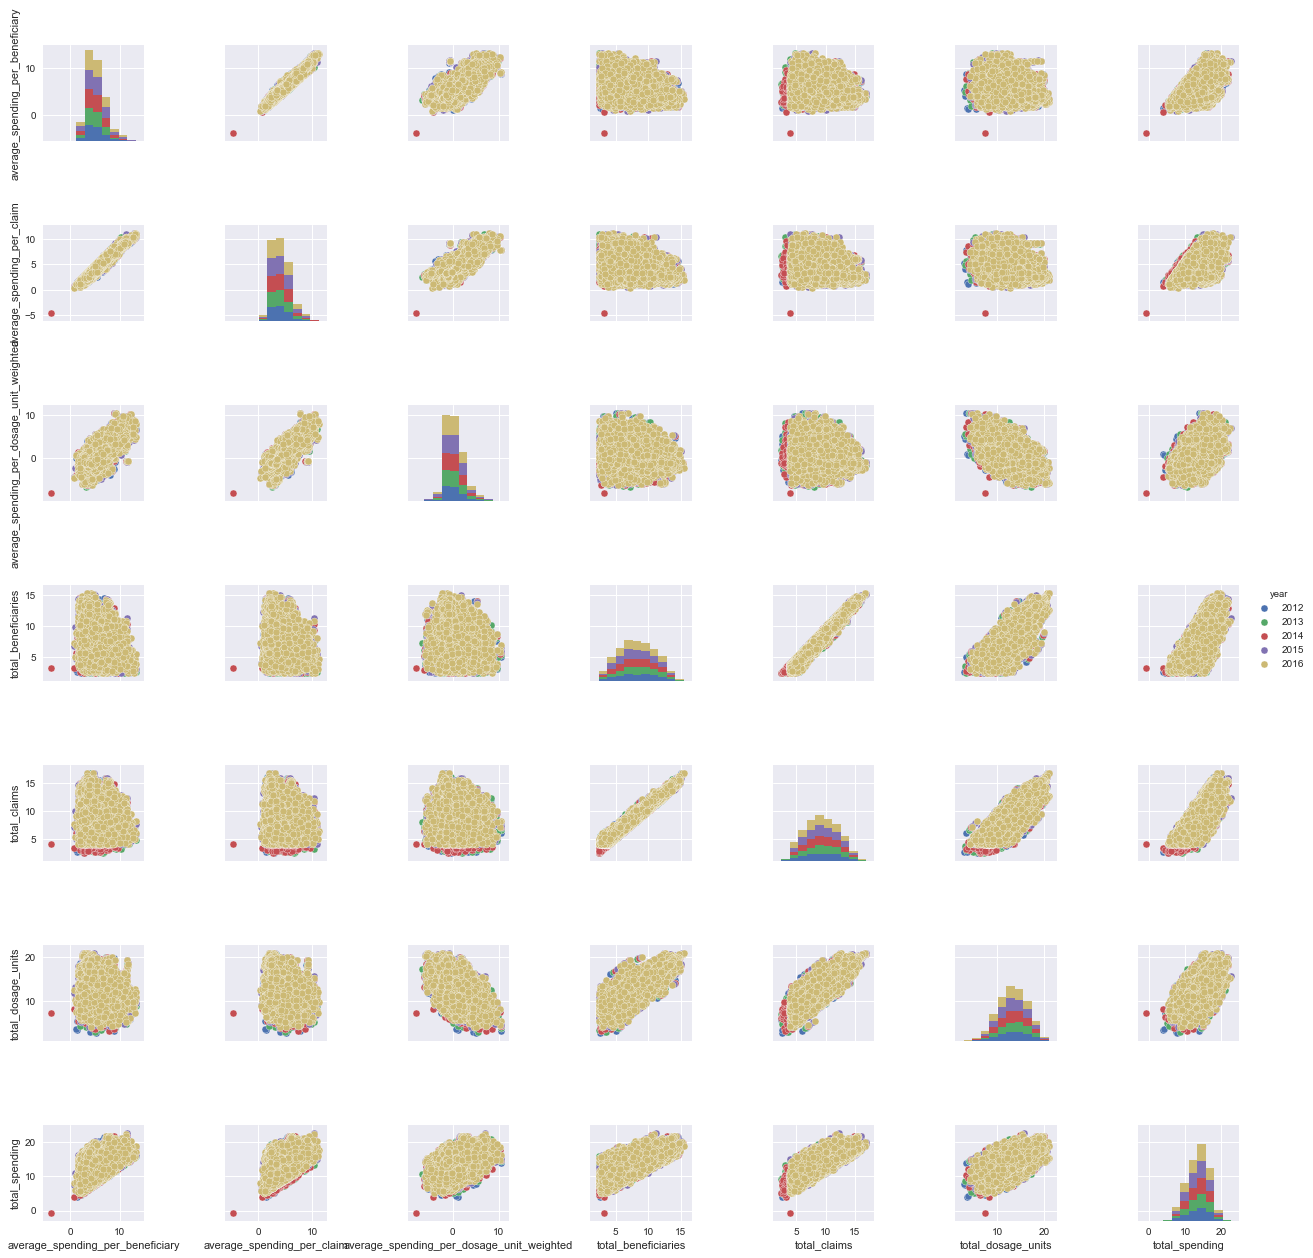

In [87]:
sns.pairplot(
    data = pd.concat([spend_manufact_tidy['year'], spend_manufact_tidy.iloc[:, 4:].apply(np.log)], axis = 1).dropna(), 
    vars = ['average_spending_per_beneficiary', 'average_spending_per_claim',
       'average_spending_per_dosage_unit_weighted', 'total_beneficiaries',
       'total_claims', 'total_dosage_units', 'total_spending'],
    hue = 'year', size = 2.5
)
sns.plt.show()

In [73]:
pd.concat([spend_manufact_tidy['year'], spend_manufact_tidy.iloc[:, 4:].apply(np.log)], axis = 1).dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30078 entries, 0 to 34209
Data columns (total 8 columns):
year                                         30078 non-null int64
average_spending_per_beneficiary             30078 non-null float64
average_spending_per_claim                   30078 non-null float64
average_spending_per_dosage_unit_weighted    30078 non-null float64
total_beneficiaries                          30078 non-null float64
total_claims                                 30078 non-null float64
total_dosage_units                           30078 non-null float64
total_spending                               30078 non-null float64
dtypes: float64(7), int64(1)
memory usage: 2.1 MB


In [93]:
top_by_manufact

,generic_name,number_of_manufacturers
0,Levetiracetam,44
1,"Syringe And Needle,Insulin,1ml",43
2,"Pen Needle, Diabetic",43
3,Metformin HCl,42
4,"Syringe-Needle,Insulin,0.5 Ml",39
5,Alcohol Antiseptic Pads,38
6,"Syring-Needl,Disp,Insul,0.3 Ml",38
7,Potassium Chloride,34
8,Bupropion HCl,32
9,Lisinopril,29


In [90]:
top_manu_w_use = dw.query(
    data_source, 
    """SELECT manu.generic_name, manu.num_manufact, info.brand_name, info.drug_uses FROM (SELECT generic_name, COUNT(*) as num_manufact
FROM manufacturer_summary
GROUP BY generic_name
ORDER BY num_manufact DESC
LIMIT 100) AS manu
INNER JOIN drug_use_information as info
USING (generic_name)"""
).dataframe

In [122]:
sorted(np.unique(top_manu_w_use['generic_name']).tolist())

['Acetaminophen With Codeine ',
 'Acyclovir ',
 'Albuterol Sulfate ',
 'Alcohol Antiseptic Pads ',
 'Alendronate Sodium ',
 'Alprazolam ',
 'Amlodipine Besylate ',
 'Anastrozole ',
 'Atenolol ',
 'Atorvastatin Calcium ',
 'Azithromycin ',
 'Bupropion HCl ',
 'Carbamazepine ',
 'Carbidopa/Levodopa ',
 'Carvedilol ',
 'Ciprofloxacin HCl ',
 'Citalopram Hydrobromide ',
 'Clindamycin Phosphate ',
 'Clonazepam ',
 'Clonidine HCl ',
 'Clopidogrel Bisulfate ',
 'Cyclobenzaprine HCl ',
 'Diclofenac Sodium ',
 'Diltiazem HCl ',
 'Divalproex Sodium ',
 'Donepezil HCl ',
 'Doxycycline Hyclate ',
 'Duloxetine HCl ',
 'Escitalopram Oxalate ',
 'Estradiol ',
 'Famotidine ',
 'Finasteride ',
 'Fluconazole ',
 'Fluoxetine HCl ',
 'Fluticasone Propionate ',
 'Furosemide ',
 'Gabapentin ',
 'Galantamine HBr ',
 'Glipizide ',
 'Hydrochlorothiazide ',
 'Hydrocodone/Acetaminophen ',
 'Hydrocortisone ',
 'Hydroxyzine HCl ',
 'Ketorolac Tromethamine ',
 'Lamotrigine ',
 'Levetiracetam ',
 'Levofloxacin ',
 '

In [121]:
sorted(top_by_manufact['generic_name'].tolist())

['Acyclovir ',
 'Albuterol Sulfate ',
 'Alcohol Antiseptic Pads ',
 'Alendronate Sodium ',
 'Alprazolam ',
 'Amlodipine Besylate ',
 'Anastrozole ',
 'Atenolol ',
 'Atorvastatin Calcium ',
 'Azithromycin ',
 'Bupropion HCl ',
 'Carbamazepine ',
 'Carbidopa/Levodopa ',
 'Carvedilol ',
 'Ciprofloxacin HCl ',
 'Citalopram Hydrobromide ',
 'Clindamycin Phosphate ',
 'Clonidine HCl ',
 'Clopidogrel Bisulfate ',
 'Cyclobenzaprine HCl ',
 'Diclofenac Sodium ',
 'Diltiazem HCl ',
 'Divalproex Sodium ',
 'Donepezil HCl ',
 'Doxycycline Hyclate ',
 'Duloxetine HCl ',
 'Escitalopram Oxalate ',
 'Estradiol ',
 'Famotidine ',
 'Finasteride ',
 'Fluconazole ',
 'Fluoxetine HCl ',
 'Fluticasone Propionate ',
 'Furosemide ',
 'Gabapentin ',
 'Galantamine HBr ',
 'Glipizide ',
 'Hydrochlorothiazide ',
 'Hydrocodone/Acetaminophen ',
 'Hydrocortisone ',
 'Hydroxyzine HCl ',
 'Ketorolac Tromethamine ',
 'Lamotrigine ',
 'Levetiracetam ',
 'Levofloxacin ',
 'Levonorgestrel-Ethin Estradiol ',
 'Lidocaine HC